This notebook offers the analysis of patients who are suffering or maybe going to suffer from heart disease. It predicts which patient is at high risk of having a heart attack in the future. 

## Importing Libraries

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# reading Dataset
df = pd.read_excel("heart.xlsx")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# altering Columns
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'excercise_included_angina', 'oldpeak', 'slope', 'number_of_major_vessels', 'thallium_stress_test', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,excercise_included_angina,oldpeak,slope,number_of_major_vessels,thallium_stress_test,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# df.info gives the info about columns datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        303 non-null    int64  
 1   sex                        303 non-null    int64  
 2   chest_pain_type            303 non-null    int64  
 3   resting_blood_pressure     303 non-null    int64  
 4   cholestrol                 303 non-null    int64  
 5   fasting_blood_sugar        303 non-null    int64  
 6   rest_ecg                   303 non-null    int64  
 7   max_heart_rate_achieved    303 non-null    int64  
 8   excercise_included_angina  303 non-null    int64  
 9   oldpeak                    303 non-null    float64
 10  slope                      303 non-null    int64  
 11  number_of_major_vessels    303 non-null    int64  
 12  thallium_stress_test       303 non-null    int64  
 13  target                     303 non-null    int64  

* The above data represents the data type of each column in the Dataset 

In [6]:
# df.describe gives the statistical description/inforamtion about dataset
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,excercise_included_angina,oldpeak,slope,number_of_major_vessels,thallium_stress_test,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Above tabular data gives statistical description of data which helps in ML Modelling. describe() is used to view some basic statistical details like percentile, mean, standard deviation, min, max, etc. of a data frame for each column. with the help of this function, we can directly calculate some values such as max, min, standard deviation, count, etc. 

In [7]:
#Checking the size of the data
df.shape

(303, 14)

.shape returns a tuple that shows the dimensionality of the data frame.

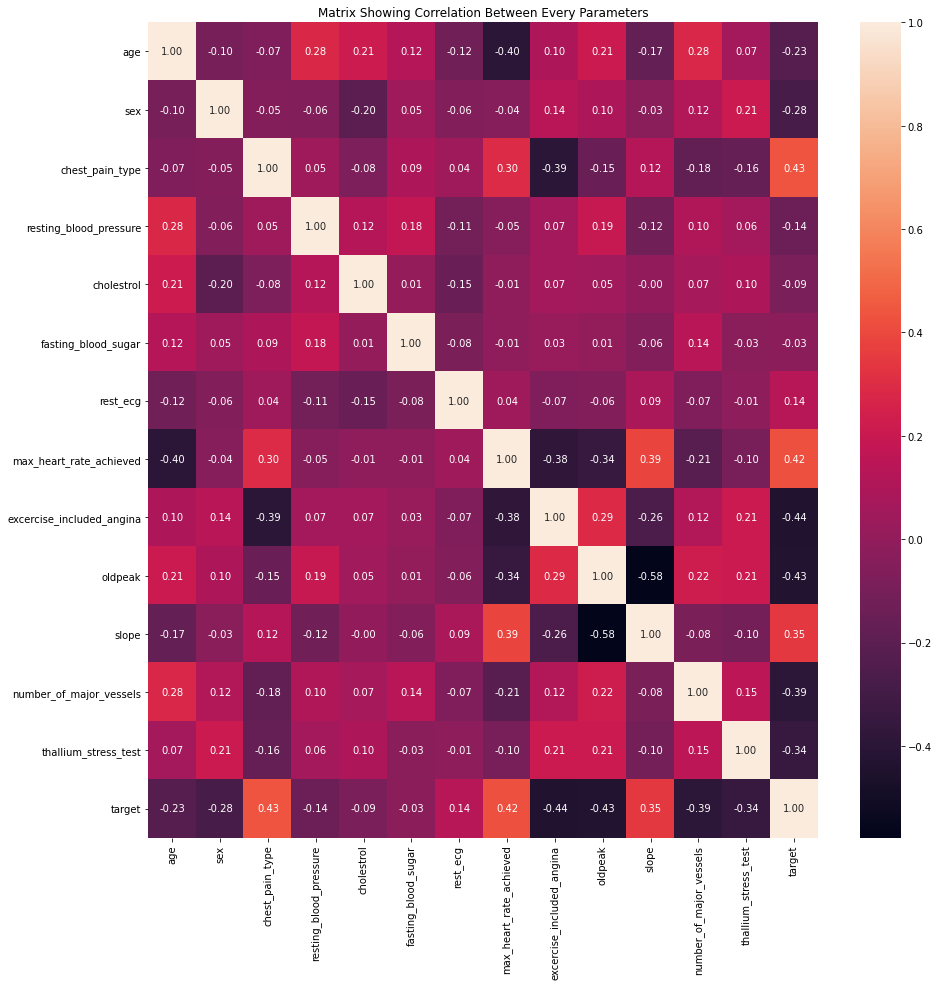

In [8]:
#heatmap correlation between each parameter
plt.figure(figsize=(15,15))
ax = plt.axes()
corr = df.corr()
sns.heatmap(corr, fmt='.2f', annot=True)
ax.set_title('Matrix Showing Correlation Between Every Parameters')
plt.show()

Correlation analysis is used to quantify the degree to which two variables are related. Through the correlation analysis, we can evaluate correlation coefficient that tells you how much one variable changes when the other one does. Correlation analysis provides you with a linear relationship between two variables.

We can see from the above correlation values that **excercise_included_angina** is **negatively** strongly related with target variable and **chest_pain_type** is **positively** strongly related with target variable. So now exploring each parameter for the target one by one.

Category by age Wise
	Children: 0
	Youth:    0
	Adult:    262
	Senior:   41


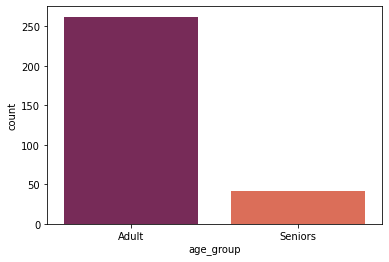

In [9]:
lst = []
for i in df["age"].values:
    if i <= 14:
        lst.append("children")
    if i > 14 and i <=24:
        lst.append("youth")
    if i > 24 and i <=64:
        lst.append("adult")
    if i > 64:
        lst.append("senior")
df["age_group"] = lst
print("Category by age Wise")
print("\tChildren:", sum(df["age_group"]=="children"))
print("\tYouth:   ", sum(df["age_group"]=="youth"))
print("\tAdult:   ", sum(df["age_group"]=="adult"))
print("\tSenior:  ", sum(df["age_group"]=="senior"))
x = sns.countplot(x='age_group', data=df, palette='rocket')
x.set(xticklabels=['Adult',"Seniors"])
plt.show()

Age is one of the most important risk factors in developing cardiovascular or heart diseases, with approximately a tripling of risk with each decade of life. As age increases the risk of heart diseases increases with multiple folds.

In the above histogram, age is divided into four parts
1. Children = less than 14
2. Youth = 15 to 24
3. Adult = 25 to 64
4. Senior = above 64

This is divided with reference to https://www.statcan.gc.ca/eng/concepts/definitions/age2

According to the data, we can see that Adults are more prone to the disease as compared to others and there is not much data available above the age of 64 so it has fewer values.

In [10]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,excercise_included_angina,oldpeak,slope,number_of_major_vessels,thallium_stress_test,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,adult
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,adult
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,adult
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,adult
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,adult


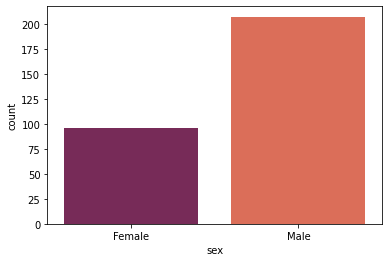

In [11]:
x = sns.countplot(x='sex', data=df, palette='rocket')
x.set(xticklabels=['Female',"Male"])
plt.show()

The above graph shows that the number of male patients is more as compared to female patients in the dataset. There is a total of **303** patients out of which **206** are male patients and **97** are female patients.

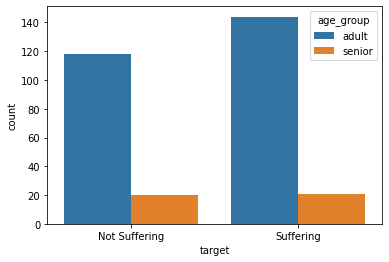

In [12]:
x = sns.countplot(x='target', hue='age_group', data=df)
x.set(xticklabels=['Not Suffering',"Suffering"])
plt.show()
ns = sum(df[df["age_group"]=="adult"]["target"]==0)
s = sum(df[df["age_group"]=="adult"]["target"]==1)
#print("There is {:.2f}% raise in Adult pateints who sufferring from heart disease compare to non-suffering from heart disease adult pateints".format(((s-ns)/((s+ns)/2))*100))

ns = sum(df[df["age_group"]=="senior"]["target"]==0)
s = sum(df[df["age_group"]=="senior"]["target"]==1)
#print("There is {:.2f}% raise in Senior pateints who sufferring from heart disease compare to non suffering from heart disease senior pateints".format(((s-ns)/((s+ns)/2))*100))

From the above graph, there are 2 points to be noticed

1. There is **19.85%** raise in Adult patients who suffering from heart disease compared to non-suffering from heart disease adult patients.

2. There is **4.88%** raise in Senior patients who suffer from heart disease compared to non-suffering from heart disease adult patients.

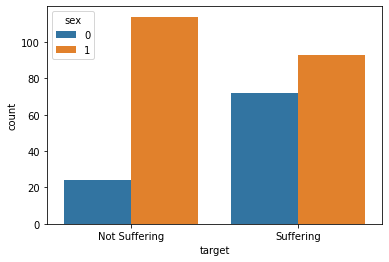

In [13]:
x = sns.countplot(x='target', hue='sex',data=df)
x.set(xticklabels=['Not Suffering',"Suffering"])
plt.show()
ns = sum(df[df["sex"]==0]["target"]==0)
s = sum(df[df["sex"]==0]["target"]==1)
#print("There is {:.2f}% raise in Female pateints who sufferring from heart disease compare to non-suffering from heart disease Female pateints".format(((s-ns)/((s+ns)/2))*100))

ns = sum(df[df["sex"]==1]["target"]==0)
s = sum(df[df["sex"]==1]["target"]==1)
#print("There is {:.2f}% decreased in male pateints who sufferring from heart disease compare to non suffering from heart disease Male pateints".format(abs(((s-ns)/((s+ns)/2))*100)))

The above graph shows that,

1. There is a **100.00%** raise in Female patients who suffer from heart disease compared to non-suffering from heart disease Female patients

2. There is a **20.29%** decrease in male patients who suffer from heart disease compared to non-suffering from heart disease Male patients

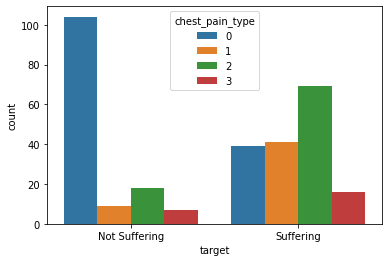

In [14]:
x = sns.countplot(x='target', hue='chest_pain_type',data=df)
x.set(xticklabels=['Not Suffering',"Suffering"])
plt.show()
#print("0 ->", sum(df[df["target"]==1]["chest_pain_type"]==0)/sum(df["target"]==1))
#print("1 ->", sum(df[df["target"]==1]["chest_pain_type"]==1)/sum(df["target"]==1))
#print("2 ->", sum(df[df["target"]==1]["chest_pain_type"]==2)/sum(df["target"]==1))
#print("3 ->", sum(df[df["target"]==1]["chest_pain_type"]==3)/sum(df["target"]==1))

The above graph shows the chest pain type for the target.

**Angina** is a type of chest pain caused by reduced blood flow to the heart. Angina is a symptom of coronary artery disease. Angina, also called angina pectoris, is often described as squeezing, gripping, pressure, heaviness, tightness, or pain in your chest.

This are 4 main type of chest pain.

1. **Typical angina** - Typical angina (TA) is defined as substernal chest pain precipitated by physical exertion or emotional stress and relieved with rest or nitroglycerin. Women and elderly patients usually have atypical symptoms both at rest and during stress, often in the setting of nonobstructive coronary artery disease (CAD).


2. **Atypical angina** - When one experiences chest pain that doesn’t meet the criteria for angina, it’s known as atypical chest pain. Angina chest pain is pressure or squeezing like sensation that is usually caused when your heart muscle doesn’t get an adequate supply of oxygenated blood. If the chest pain cannot be considered as angina, then that person is said to suffer from atypical chest pain, which unlike typical chest pain, doesn’t occur in the sternum and may radiate to other parts of the body. Some common causes of atypical chest pain include the following: Lung Problems, Costochondritis, Acid reflux, Stress.


3. **Non — anginal pain** - Non-cardiac chest pain is often described as feeling like angina, the chest pain caused by heart disease. The patient feels pressure or squeezing pain behind the breast bone. Some people also report the pain spreads to the neck, left arm, or back. The pain can last for a few minutes or for hours.


4. **Asymptotic** - Asymptomatic angina has been described. It is defined as typical ECG changes recorded on an ambulatory ECG monitoring, depicting underlying ischemia, with the absence of angina symptoms.

### Below is a description of the above graph

1. There are **41%** of patients who has non - anginal chest pain and suffering from heart disea+se
2. There are **25%** of patients who has atypical angina chest pain and suffering from heart disease
3. There are **24%** of patients who has typical anginal chest pain and suffering from heart disease
4. **10%** of patients who suffer from heart disease having asymptotic chest pain(i.e. it seems they don't suffer from any of the other three chest pains)

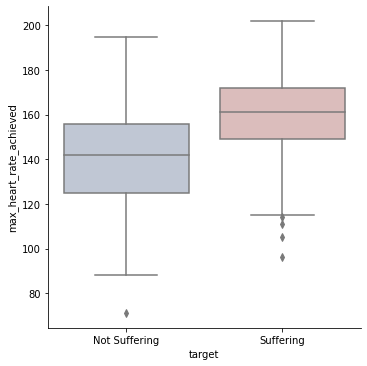

In [15]:
x = sns.catplot(x='target', y='max_heart_rate_achieved', kind='box', data=df, palette='vlag')
x.set(xticklabels=['Not Suffering',"Suffering"])
plt.show()

The above plot shows the max heart rate achieved by the patient.

Max heart rate achieved: The increase in cardiovascular risk, associated with the acceleration of heart rate, was comparable to the increase in risk observed with high blood pressure. It has been shown that an increase in heart rate by 10 beats per minute was associated with an increase in the risk of cardiac death by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg.

### Below is a description of the above plot

In the graph, we can clearly see that the patient suffering from heart disease have a high heart rate as compared to the patient not suffering from heart disease.

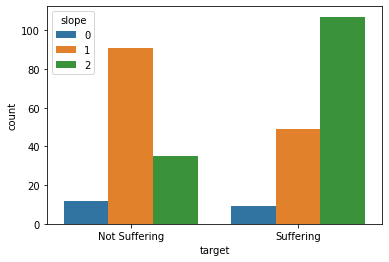

In [16]:
x = sns.countplot(x='target', hue='slope',data=df)
x.set(xticklabels=['Not Suffering',"Suffering"])
plt.show()
#print("0 ->", sum(df[df["target"]==1]["slope"]==0)/sum(df["target"]==1))
#print("1 ->", sum(df[df["target"]==1]["slope"]==1)/sum(df["target"]==1))
#print("2 ->", sum(df[df["target"]==1]["slope"]==2)/sum(df["target"]==1))

In the above graph, the slope represents the Peak exercise ST segment. 

The ST segment is the flat, isoelectric section of the ECG between the end of the S wave (the J point) and the beginning of the T wave.

1. The ST Segment represents the interval between ventricular depolarization and repolarization.
2. The most important cause of ST-segment abnormality (elevation or depression) is myocardial ischemia or infarction.

#### Causes of ST-Segment Elevation

* Acute myocardial infarction
* Coronary vasospasm (Printzmetal’s angina)
* Pericarditis
* Benign early repolarization
* Left bundle branch block
* Left ventricular hypertrophy
* Ventricular aneurysm
* Brugada syndrome
* Ventricular paced rhythm
* Raised intracranial pressure
* Takotsubo Cardiomyopathy

The three types of the slope are

0 = upsloping

1 = flat

2 = downsloping

### Below is a description of the above graph

* upsloping => **5%**
* flat => **30%**
* downsloping => **65%**

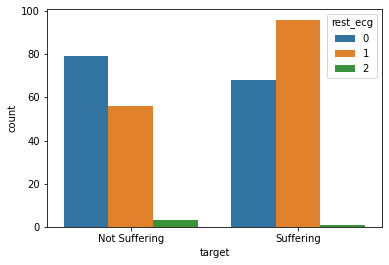

In [17]:
x = sns.countplot(x='target', hue='rest_ecg',data=df)
x.set(xticklabels=['Not Suffering',"Suffering"])
plt.show()
#print("0 ->", sum(df[df["target"]==1]["rest_ecg"]==0)/sum(df["target"]==1))
#print("1 ->", sum(df[df["target"]==1]["rest_ecg"]==1)/sum(df["target"]==1))
#print("2 ->", sum(df[df["target"]==1]["rest_ecg"]==2)/sum(df["target"]==1))

In the above Graph, there is a relation between **rest_ecg** to **target**

The resting electrocardiogram is a test that measures the electrical activity of the heart. The resting ECG is a simple, quick, and painless test. The resting ECG can detect certain heart conditions such as hypertrophy of the heart, ischemia, myocardial infarction, sequelae of myocardial infarction, cardiac arrhythmias, etc. The test takes about 5 minutes and no preparation is necessary. An ECG can help detect:

* arrhythmias – where the heart beats too slowly, too quickly, or irregularly
* coronary heart disease – where the heart's blood supply is blocked or interrupted by a build-up of fatty substances
* heart attacks – where the supply of blood to the heart is suddenly blocked
* cardiomyopathy – where the heart walls become thickened or enlarged

#### Resting ECG: displays resting electrocardiographic results

0 = normal

1 = having ST-T wave abnormality

2 = left ventricular hyperthrophy

### Below is a description of the above graph

1. There are **41%** patients who are having normal ecg and suffering from heart disease
2. There are **58%** patients who are having ST - T wave abnormality ecg and suffering from heart disease
3. There are **0.6%** patients who are having left ventricular hyperthrophy ecg and suffering from heart disease

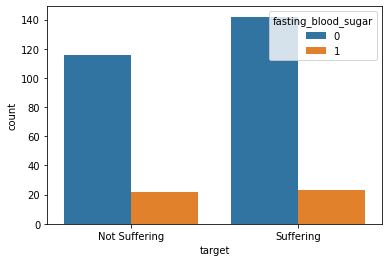

In [18]:
x = sns.countplot(x='target', hue='fasting_blood_sugar',data=df)
x.set(xticklabels=['Not Suffering',"Suffering"])
plt.show()
#print("0 ->", sum(df[df["target"]==1]["fasting_blood_sugar"]==0)/sum(df["target"]==1))
#print("1 ->", sum(df[df["target"]==1]["fasting_blood_sugar"]==1)/sum(df["target"]==1))

In the above Graph, there is a relation between **fasting_blood_sugar** to **target**

Fasting Blood Sugar: Not producing enough of a hormone secreted by your pancreas (insulin) or not responding to insulin properly causes your body’s blood sugar levels to rise, increasing your risk of a heart attack.

Fasting blood sugar test. A blood sample will be taken after an overnight fast. A fasting blood sugar level less than 100 mg/dL (5.6 mmol/L) is normal. A fasting blood sugar level from 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes. If it's 126 mg/dL (7 mmol/L) or higher on two separate tests, you have diabetes.

For the above graph assumptions are taken as,

fasting blood sugar > 120mg/dl then : 1 (true)

else : 0 (false)

In the graph the proportion of patient suffering from heart disease are

1. There are **86%** patients who are having fasting blood sugar >120 and suffering from heart disease
2. There are **14%** patients who are having fasting blood sugar <120 and suffering from heart disease

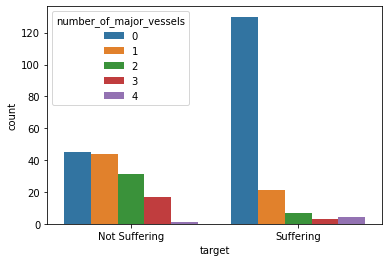

In [19]:
x = sns.countplot(x='target', hue='number_of_major_vessels',data=df)
x.set(xticklabels=['Not Suffering',"Suffering"])
plt.show()
#print("0 ->", sum(df[df["target"]==1]["number_of_major_vessels"]==0)/sum(df["target"]==1))
#print("1 ->", sum(df[df["target"]==1]["number_of_major_vessels"]==1)/sum(df["target"]==1))
#print("2 ->", sum(df[df["target"]==1]["number_of_major_vessels"]==2)/sum(df["target"]==1))
#print("3 ->", sum(df[df["target"]==1]["number_of_major_vessels"]==3)/sum(df["target"]==1))
#print("4 ->", sum(df[df["target"]==1]["number_of_major_vessels"]==4)/sum(df["target"]==1))

The above graph represents the number of major vessels to target

The number of major vessels is ranged from 0 to 4 colored by fluoroscopy

Fluoroscopy is a type of medical imaging that shows a continuous X-ray image on a monitor, much like an X-ray movie. During a fluoroscopy procedure, an X-ray beam is passed through the body. The image is transmitted to a monitor so the movement of a body part or an instrument or contrast agent (“X-ray dye”) through the body can be seen in detail.

*  **cardiac catheterization is used to examine the heart and the coronary arteries that supply blood to the heart muscle.**

### Below is a description of the above graph

1. There are **79%** patients who are having Type 0 major vessels and suffering from heart disease
2. There are **13%** patients who are having Type 1 major vessels and suffering from heart disease
3. There are **4%** patients who are having Type 2 major vessels and suffering from heart disease
4. There are **2%** patients who are having Type 3 major vessels and suffering from heart disease
5. There are **2%** patients who are having Type 4 major vessels and suffering from heart disease

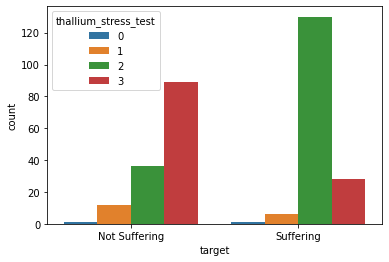

In [20]:
x = sns.countplot(x='target', hue='thallium_stress_test',data=df)
x.set(xticklabels=['Not Suffering',"Suffering"])
plt.show()
#print("0 ->", sum(df[df["target"]==1]["thallium_stress_test"]==0)/sum(df["target"]==1))
#print("1 ->", sum(df[df["target"]==1]["thallium_stress_test"]==1)/sum(df["target"]==1))
#print("2 ->", sum(df[df["target"]==1]["thallium_stress_test"]==2)/sum(df["target"]==1))
#print("3 ->", sum(df[df["target"]==1]["thallium_stress_test"]==3)/sum(df["target"]==1))

The above graph represents thallium_stress_test to target

A thallium stress test is a nuclear imaging test that shows how well blood flows into your heart while you’re exercising or at rest. This test is also called a cardiac or nuclear stress test.

Some results are shown by thallium_stress_test

* the size of your heart chambers
* how effectively your heart pumps —that is, its ventricular function
* how well your coronary arteries supply your heart with blood, known as myocardial perfusion
* if your heart muscle is damaged or scarred from previous heart attacks

### Below is a description of the above graph

1. There are **0.4%** patients who are having type 0 thallium stress and suffering from heart disease
2. There are **3.6%** patients who are having type 1 thallium stress and suffering from heart disease
3. There are **79%** patients who are having type 2 thallium stress and suffering from heart disease
4. There are **17%** patients who are having type 3 thallium stress and suffering from heart disease

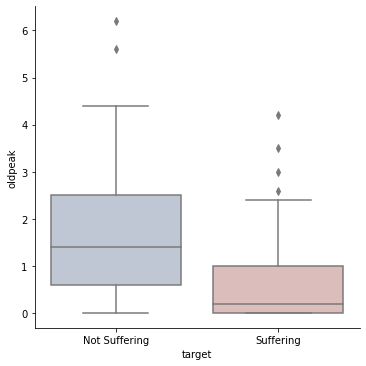

In [21]:
# x = sns.boxplot(x='target', hue='oldpeak',data=df)

x = sns.catplot(x='target', y='oldpeak', kind='box', data=df, palette='vlag')
x.set(xticklabels=['Not Suffering',"Suffering"])
plt.show()
#print("0 ->", sum(df[df["target"]==1]["slope"]==0)/sum(df["target"]==1))
#print("1 ->", sum(df[df["target"]==1]["slope"]==1)/sum(df["target"]==1))
#print("2 ->", sum(df[df["target"]==1]["slope"]==2)/sum(df["target"]==1))

The above plot shows the old peak achieved by the patient.

old peak: ST depression induced by exercise relative to rest

### Below is a description of the above plot

In the plot, we can see that the patient suffering from heart disease has a low old peak as compared to the patient not suffering from heart disease.

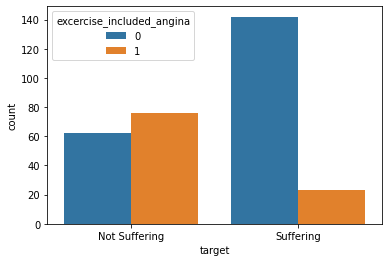

In [22]:
x = sns.countplot(x='target', hue='excercise_included_angina', data=df)
x.set(xticklabels=['Not Suffering',"Suffering"])
plt.show()
#print("0 ->", sum(df[df["target"]==1]["excercise_included_angina"]==0)/sum(df["target"]==1))
#print("1 ->", sum(df[df["target"]==1]["excercise_included_angina"]==1)/sum(df["target"]==1))

The above graph represents exercise included angina to target

the exercise included angina is a pain or discomfort associated with angina usually feels tight, gripping, or squeezing, and can vary from mild to severe. Angina is usually felt in the center of your chest but may spread to either or both of your shoulders, or your back, neck, jaw, or arm. It can even be felt in your hands.

symptoms that you may have with angina include:

* Dizziness
* Fatigue
* Nausea
* Shortness of breath
* Sweating

The range of exercise included angina

* 1 = yes
* 0 = no

### Below is a description of the above graph

1. There are **86%** patients who are having type 0 angina and suffering from heart disease
2. There are **14%** patients who are having type 1 angina and suffering from heart disease

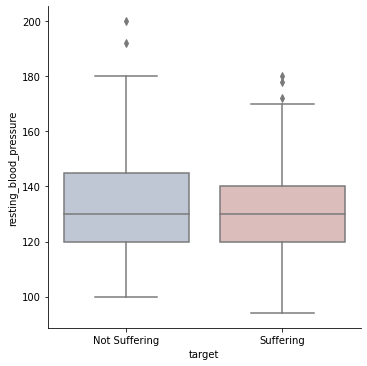

In [23]:
x = sns.catplot(x='target', y='resting_blood_pressure', kind='box', data=df, palette='vlag')
x.set(xticklabels=['Not Suffering',"Suffering"])
plt.show()

The above plot shows the resting blood pressure achieved by the patient.

Resting Blood Pressure: Over time, high blood pressure can damage arteries that feed your heart. High blood pressure that occurs with other conditions, such as obesity, high cholesterol, or diabetes, increases your risk even more.

### Below is a description of the above plot

In the plot, we can clearly see that the patient suffering from heart disease has a low resting blood pressure as compared to the patient not suffering from heart disease.

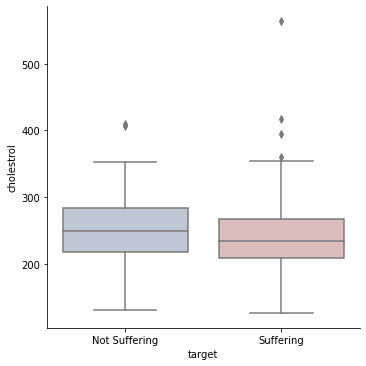

In [24]:
x = sns.catplot(x='target', y='cholestrol', kind='box', data=df, palette='vlag')
x.set(xticklabels=['Not Suffering',"Suffering"])
plt.show()

The above plot shows the Cholestrol achieved by the patient.

Cholesterol is a waxy, fat-like substance that's found in all the cells in the body. The body needs some cholesterol to make hormones, vitamin D, and substances that help digest foods. The body makes all the cholesterol it needs. Cholesterol is also found in foods from animal sources, such as egg yolks, meat, and cheese.

If we have too much cholesterol in our blood, it can combine with other substances in the blood to form plaque. Plaque sticks to the walls of our arteries. This buildup of plaque is known as atherosclerosis. It can lead to coronary artery disease, where your coronary arteries become narrow or even blocked.

Serum cholesterol levels also show the number of triglycerides present. Triglycerides are another lipid that can be measured in the blood.

A person’s serum cholesterol level can indicate their risk for conditions such as heart disease.

#### Below is a description of the above plot

In the plot, we can see that the patient suffering from heart disease have a high cholesterol as compared to the patient not suffering from heart disease.

### Modeling

In [25]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import tree, svm

In [26]:
# helper functions
def evaluation_report(model, x_train, y_train, x_test, y_test, model_name = None):
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    print(model_name + " Evaluation Report: \n")
    print("\tTrain Accuracy:", accuracy_score(y_true=y_train, y_pred=y_predict_train))
    print("\tTest Accuracy:", accuracy_score(y_true=y_test, y_pred=y_predict_test))
    print("\nClassification Report: \n", classification_report(y_true = y_test, y_pred = y_predict_test))
    labels = ["No Disease", "Disease"]
    print("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_predict_test), xticklabels=labels, yticklabels=labels, annot = True, fmt = '.2f', cmap="Blues")
    plt.show()
#     plt.subplot(121)
#     plt.plot()

In [27]:
# x, y = df
x = df.iloc[:,0:-2].values
y = df.iloc[:,-2].values

# x = df[['sex', 'cholestrol', 'age']]
# y = df['target']

In [28]:
SS = StandardScaler()
x_ss = SS.fit_transform(x)

In [29]:
MM = MinMaxScaler()
x_mm = MM.fit_transform(x)

In [30]:
# train_test_split on original data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=49)

# train_test_split on scaled data
x_train_ss, x_test_ss, y_train_ss, y_test_ss = train_test_split(x_ss, y, test_size=0.2, stratify=y, random_state=49)

# train_test_split on Minmax Scaled data
x_train_mm, x_test_mm, y_train_mm, y_test_mm = train_test_split(x_mm, y, test_size=0.2, stratify=y, random_state=49)

SVM on Original Data Evaluation Report: 

	Train Accuracy: 0.6198347107438017
	Test Accuracy: 0.5901639344262295

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.36      0.44        28
           1       0.59      0.79      0.68        33

    accuracy                           0.59        61
   macro avg       0.59      0.57      0.56        61
weighted avg       0.59      0.59      0.57        61

Confusion Matrix


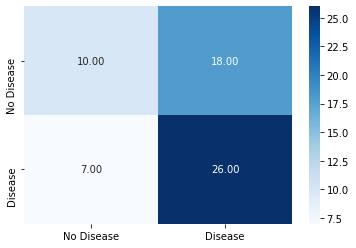

In [31]:
model_svm = svm.SVC(kernel = 'rbf')
model_svm.fit(x_train, y_train)
model_svm.score(x_test, y_test)
evaluation_report(model_svm, x_train, y_train, x_test, y_test, model_name = "SVM on Original Data")

SVM on SS Data Evaluation Report: 

	Train Accuracy: 0.8512396694214877
	Test Accuracy: 0.9016393442622951

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.91      0.91      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix


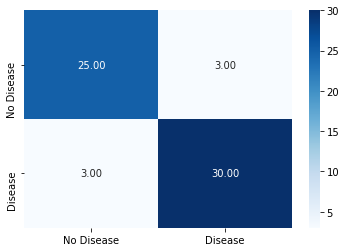

In [32]:
model_svm_ss = svm.SVC(kernel = 'linear')
model_svm_ss.fit(x_train_ss, y_train_ss)
model_svm_ss.score(x_test_ss, y_test_ss)
evaluation_report(model_svm_ss, x_train_ss, y_train_ss, x_test_ss, y_test_ss, model_name = "SVM on SS Data")

SVM on MM Data Evaluation Report: 

	Train Accuracy: 0.8429752066115702
	Test Accuracy: 0.9016393442622951

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.89      0.94      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix


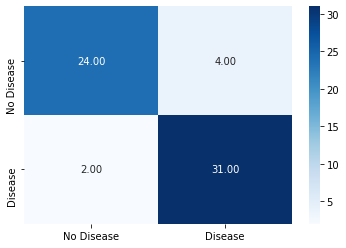

In [33]:
model_svm_mm = svm.SVC(kernel = 'linear')
model_svm_mm.fit(x_train_mm, y_train_mm)
model_svm_mm.score(x_test_mm, y_test_mm)
evaluation_report(model_svm_mm, x_train_mm, y_train_mm, x_test_mm, y_test_mm, model_name = "SVM on MM Data")

Logistic Regression on Original Data Evaluation Report: 

	Train Accuracy: 0.8471074380165289
	Test Accuracy: 0.8524590163934426

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix


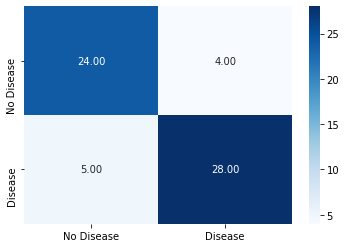

In [34]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(x_train, y_train)
model_lr.score(x_test, y_test)
evaluation_report(model_lr, x_train, y_train, x_test, y_test, model_name = "Logistic Regression on Original Data")

Logistic Regression on StandardScaler scaled Data Evaluation Report: 

	Train Accuracy: 0.8553719008264463
	Test Accuracy: 0.8524590163934426

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix


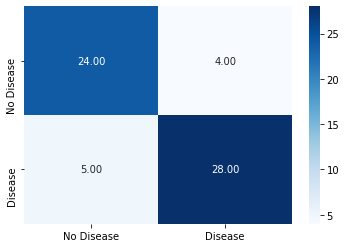

In [35]:
model_lr_ss = LogisticRegression()
model_lr_ss.fit(x_train_ss, y_train_ss)
model_lr_ss.score(x_test_ss, y_test_ss)
evaluation_report(model_lr_ss, x_train_ss, y_train_ss, x_test_ss, y_test_ss, model_name = "Logistic Regression on StandardScaler scaled Data")

Logistic Regression on Original Data Evaluation Report: 

	Train Accuracy: 0.8347107438016529
	Test Accuracy: 0.8524590163934426

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix


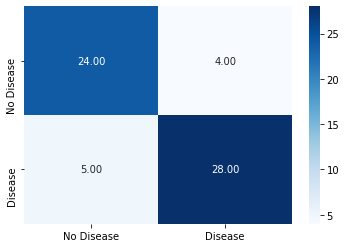

In [36]:
model_lr_mm = LogisticRegression()
model_lr_mm.fit(x_train_mm, y_train_mm)
model_lr_mm.score(x_test_mm, y_test_mm)
evaluation_report(model_lr_mm, x_train_mm, y_train_mm, x_test_mm, y_test_mm, model_name = "Logistic Regression on Original Data")

Decision Tree on Original Data Evaluation Report: 

	Train Accuracy: 1.0
	Test Accuracy: 0.8032786885245902

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        28
           1       0.86      0.76      0.81        33

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion Matrix


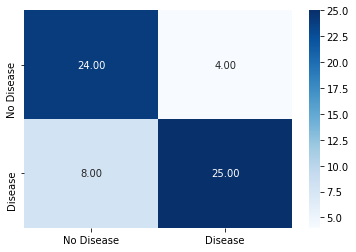

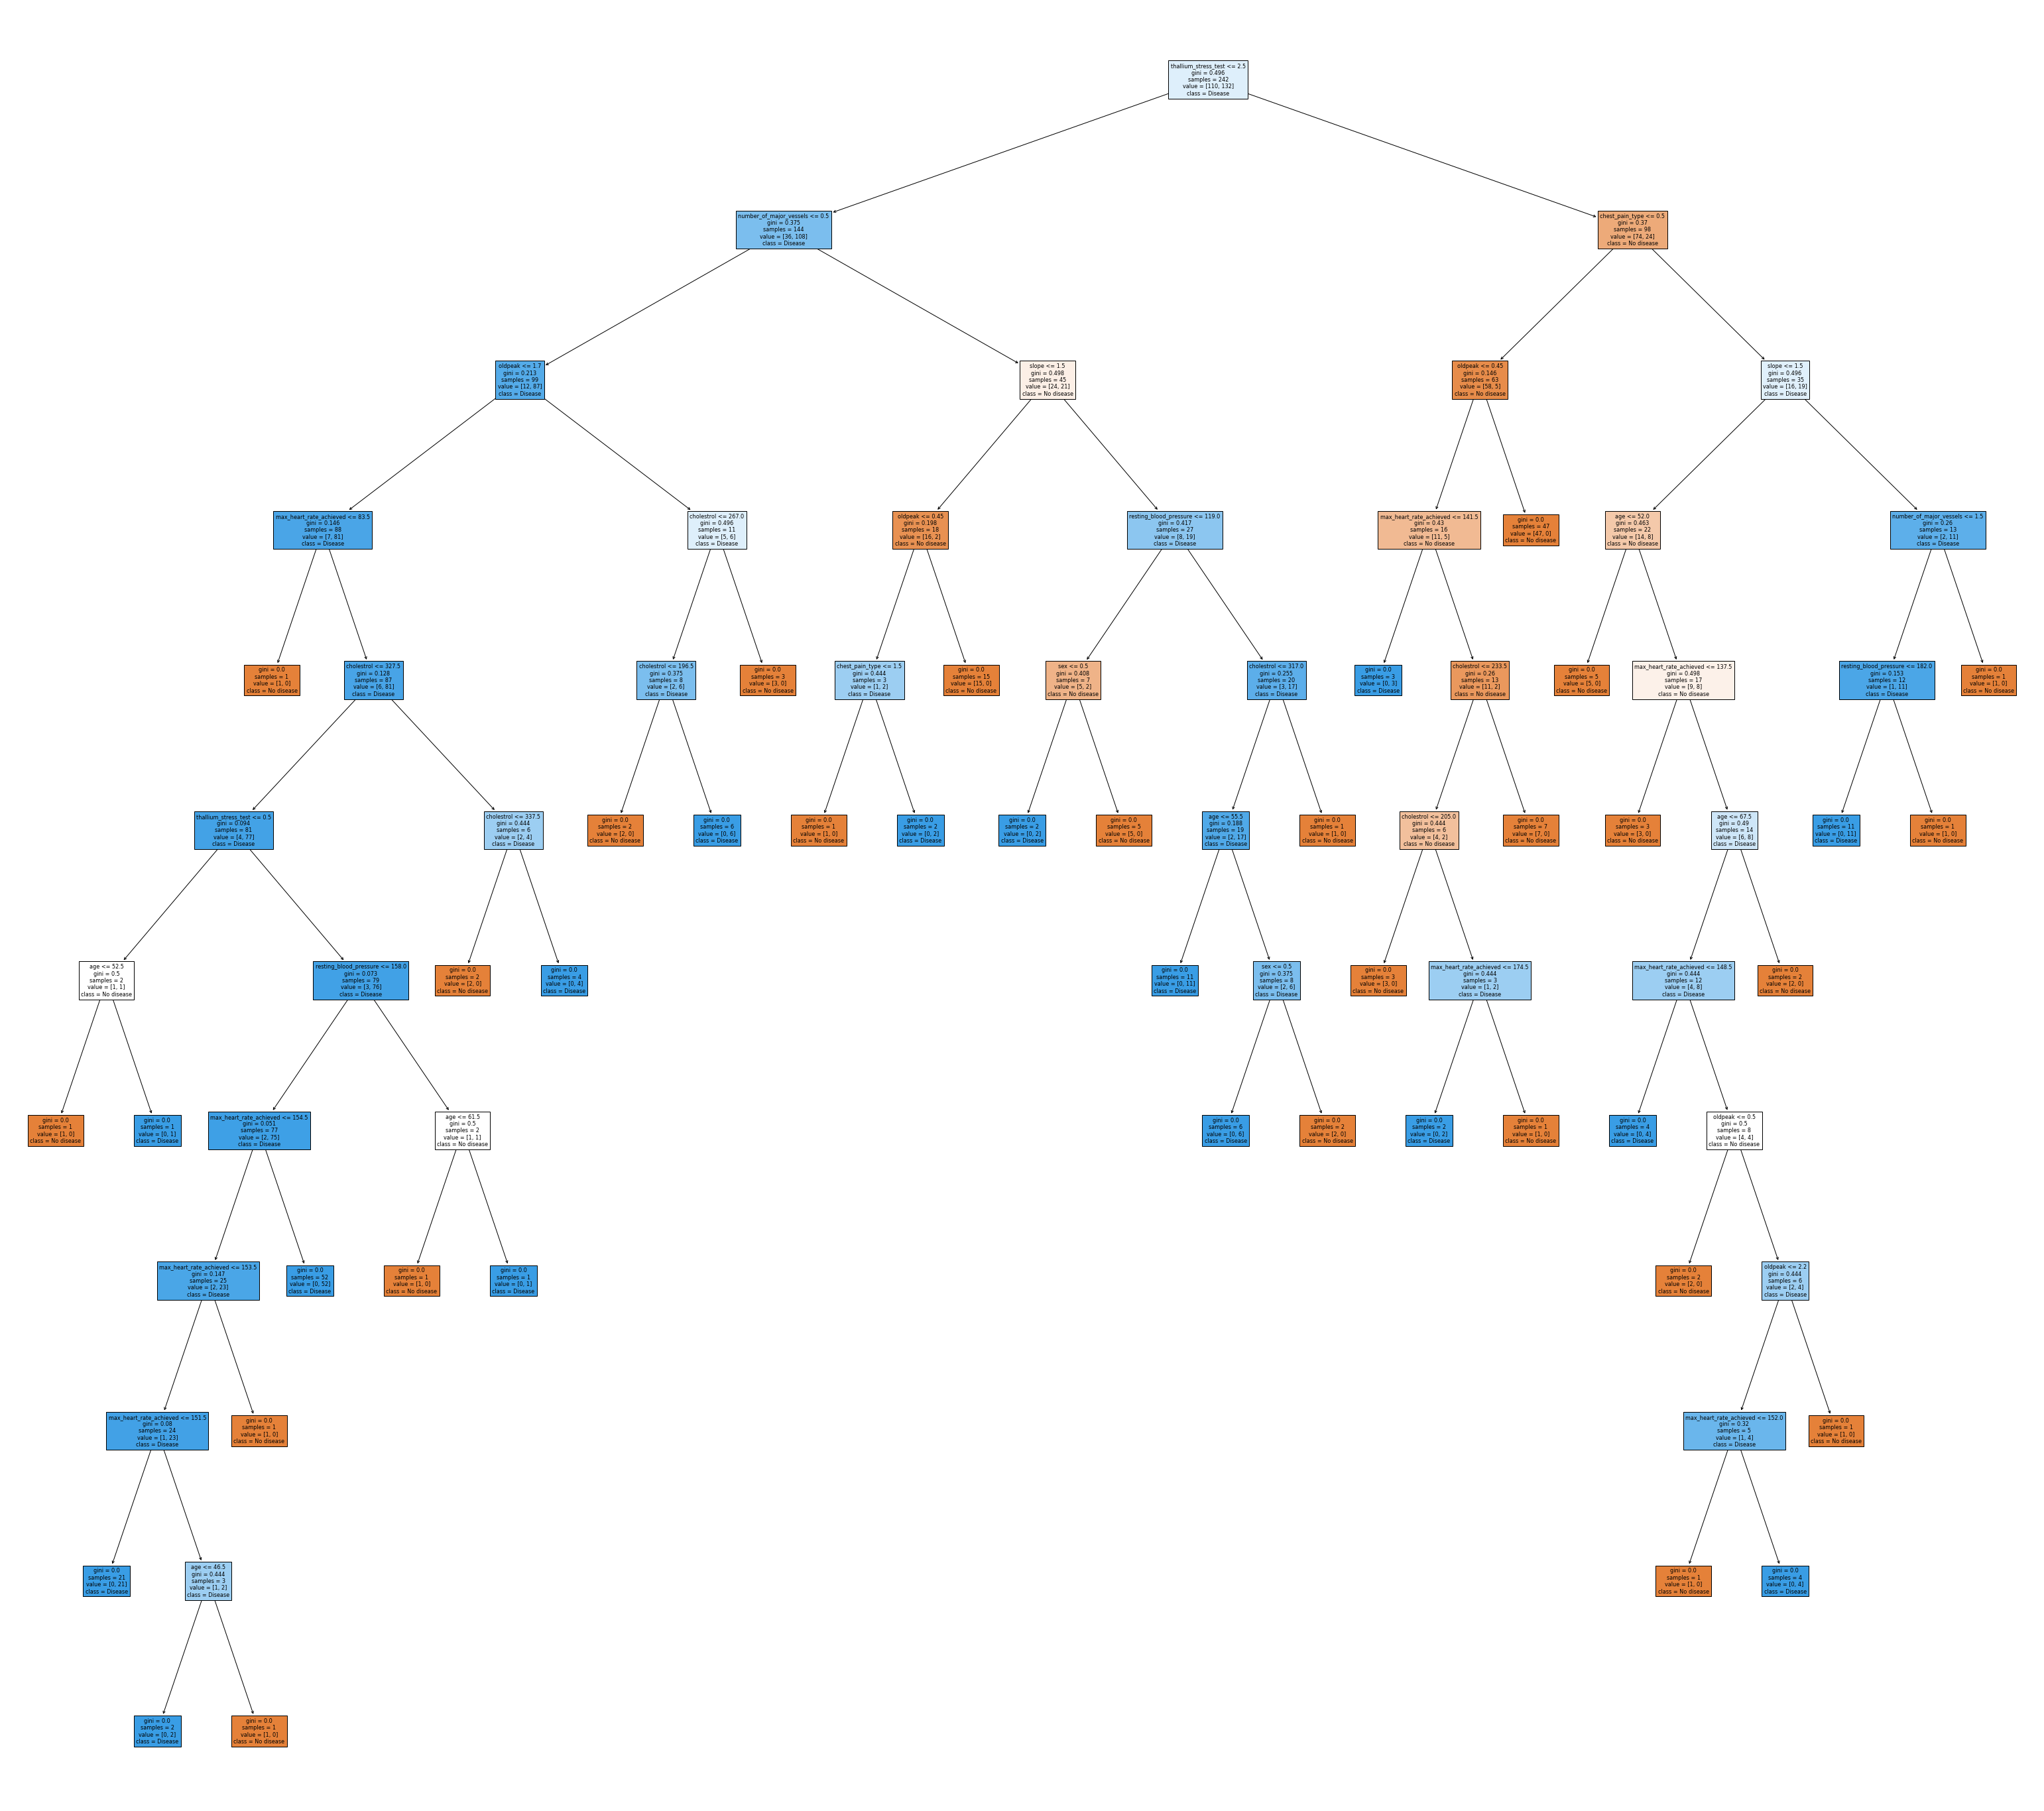

In [37]:
model_dct = DecisionTreeClassifier()
model_dct.fit(x_train, y_train)
model_dct.score(x_test, y_test)
evaluation_report(model_dct, x_train, y_train, x_test, y_test, model_name = "Decision Tree on Original Data")
fig = plt.figure(figsize=(55,50))
_ = tree.plot_tree(model_dct, 
                   feature_names=df.columns[:-2],  
                   class_names=["No disease", "Disease"],
                   filled=True)
fig.savefig("dct_original.png")

Decision Tree on Standard Scaled Data Evaluation Report: 

	Train Accuracy: 1.0
	Test Accuracy: 0.819672131147541

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.87      0.79      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix


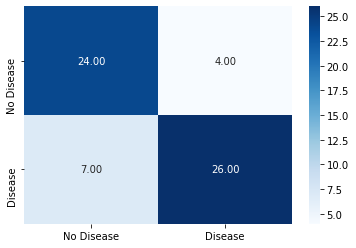

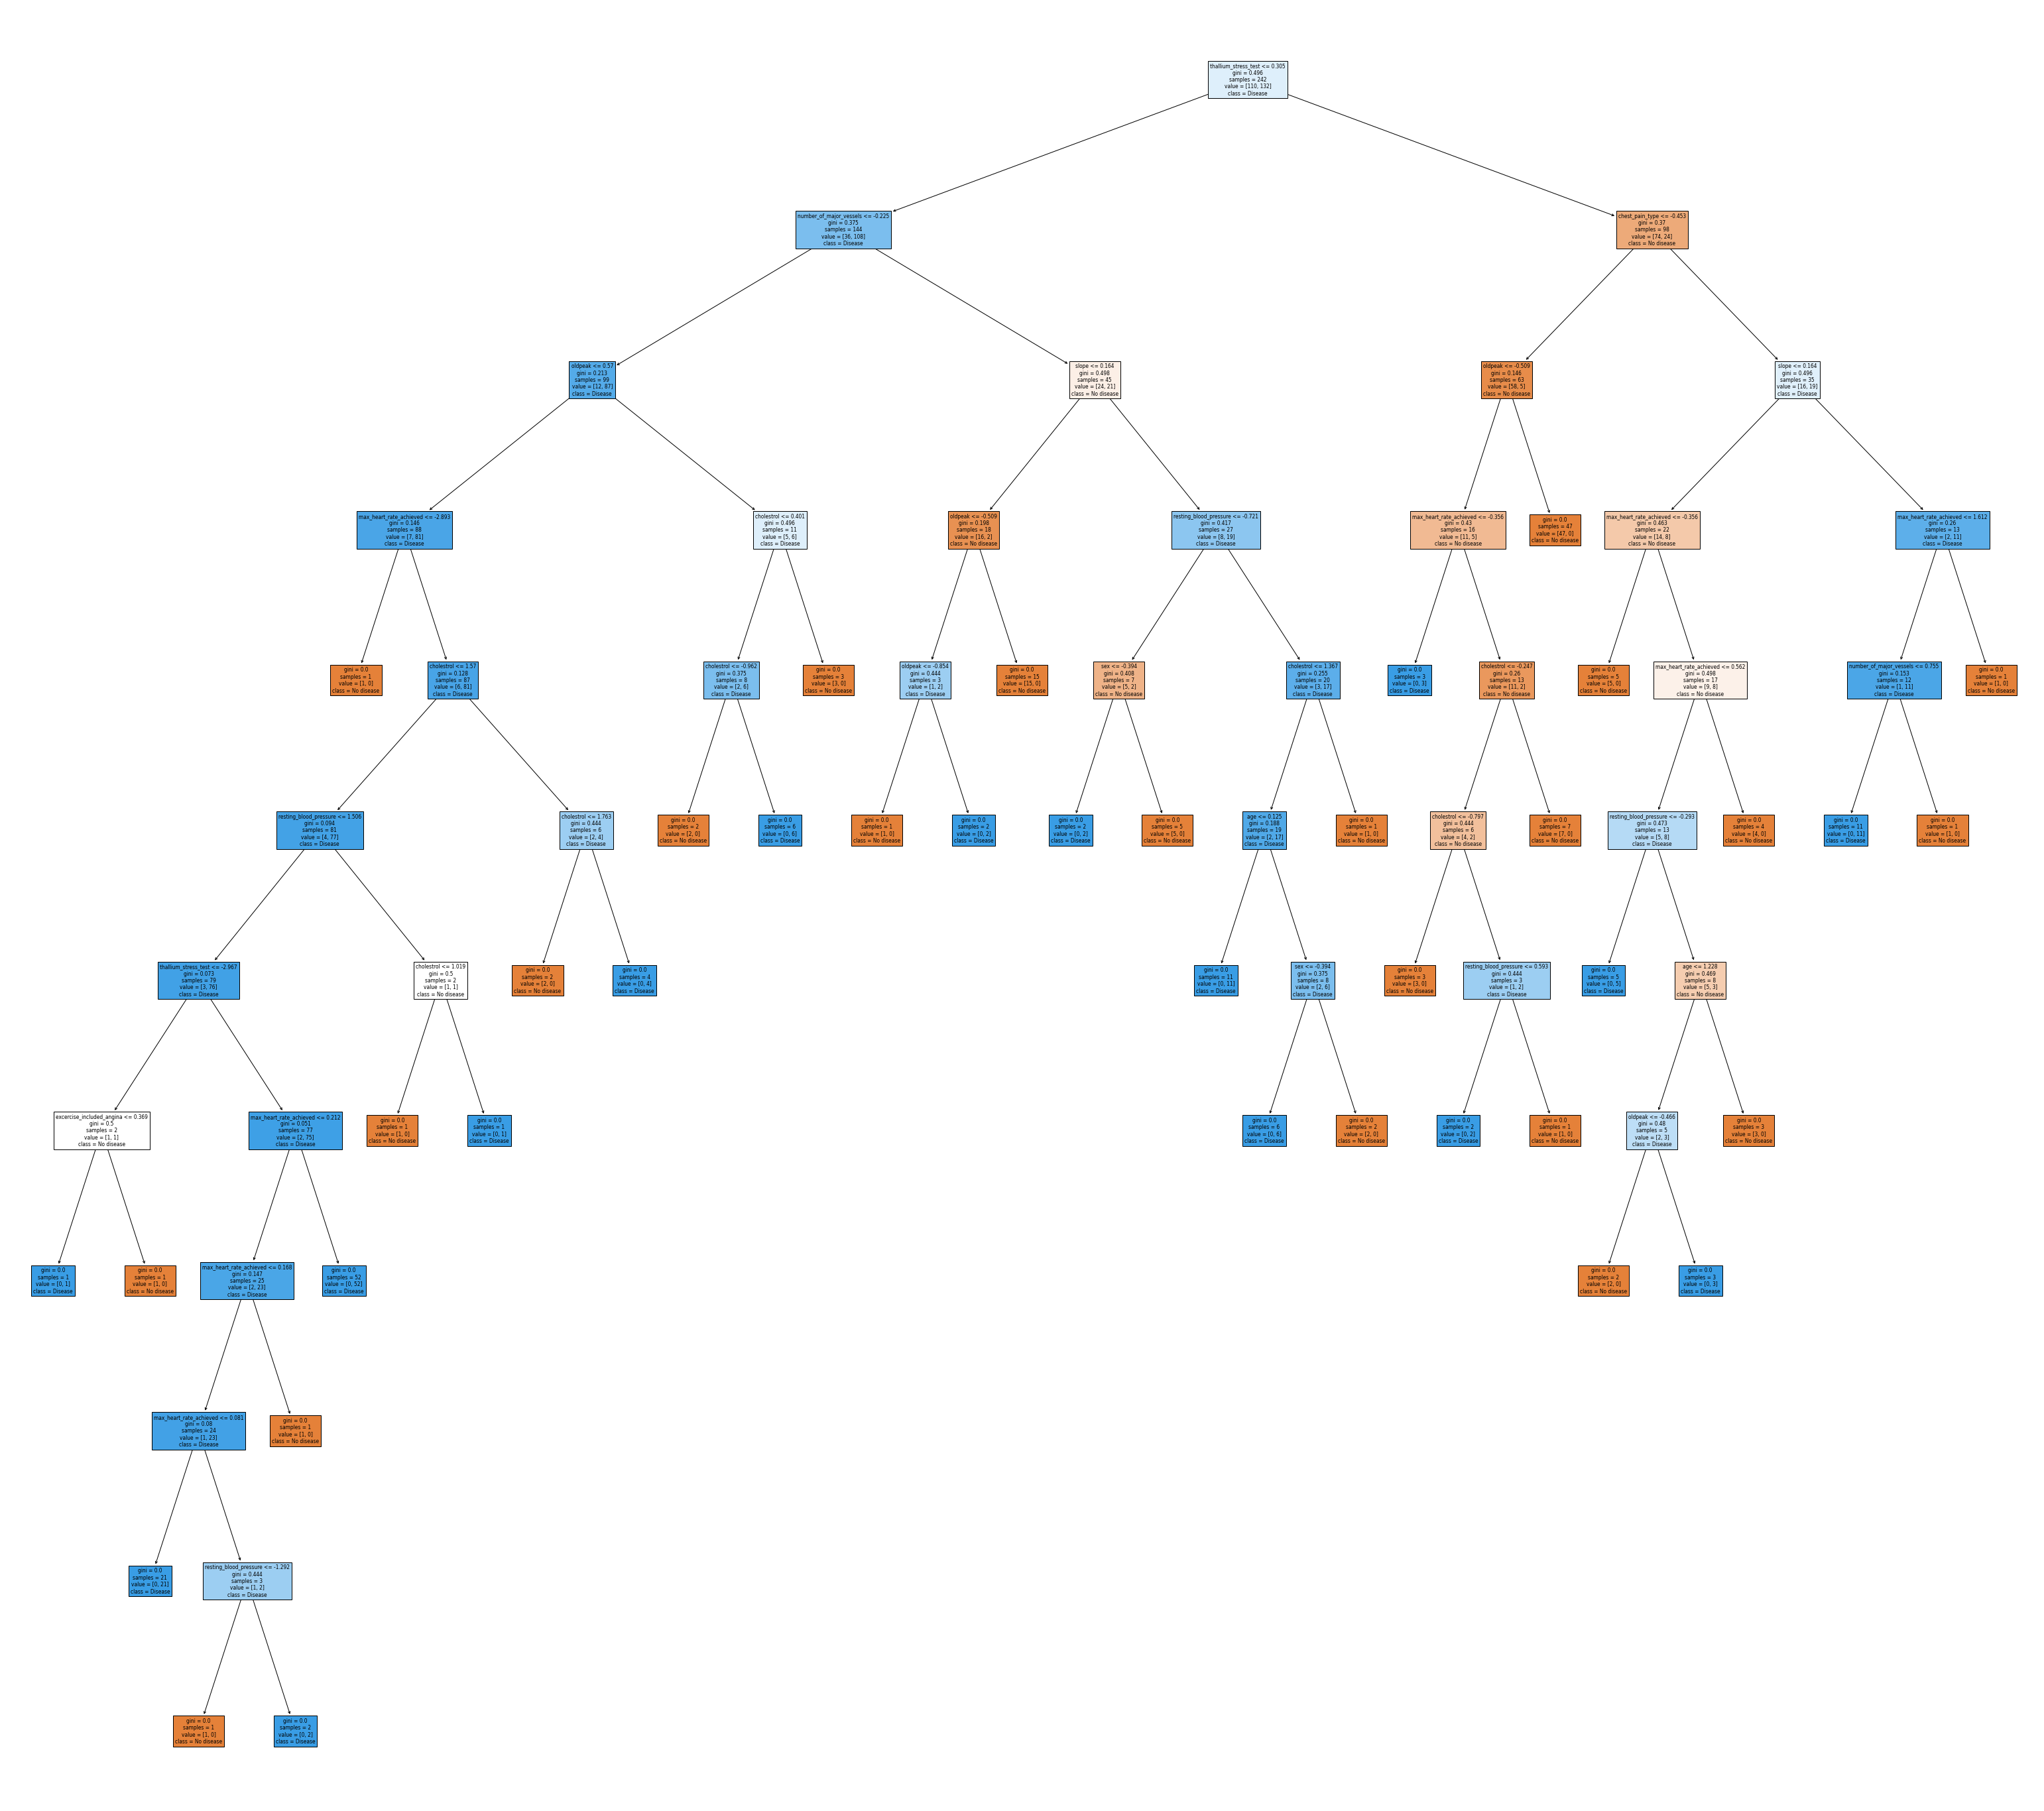

In [38]:
model_dct_ss = DecisionTreeClassifier()
model_dct_ss.fit(x_train_ss, y_train_ss)
model_dct_ss.score(x_test_ss, y_test_ss)
evaluation_report(model_dct_ss, x_train_ss, y_train_ss, x_test_ss, y_test_ss, model_name = "Decision Tree on Standard Scaled Data")
fig = plt.figure(figsize=(55,50))
_ = tree.plot_tree(model_dct_ss, 
                   feature_names=df.columns[:-2],  
                   class_names=["No disease", "Disease"],
                   filled=True)
fig.savefig("dct_ss.png")

Decision Tree on Minmax Scaled Data Evaluation Report: 

	Train Accuracy: 1.0
	Test Accuracy: 0.7213114754098361

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.79      0.72        28
           1       0.79      0.67      0.72        33

    accuracy                           0.72        61
   macro avg       0.73      0.73      0.72        61
weighted avg       0.73      0.72      0.72        61

Confusion Matrix


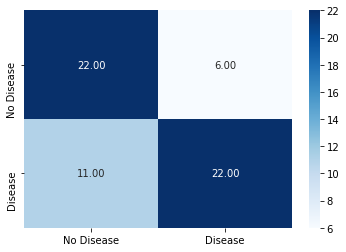

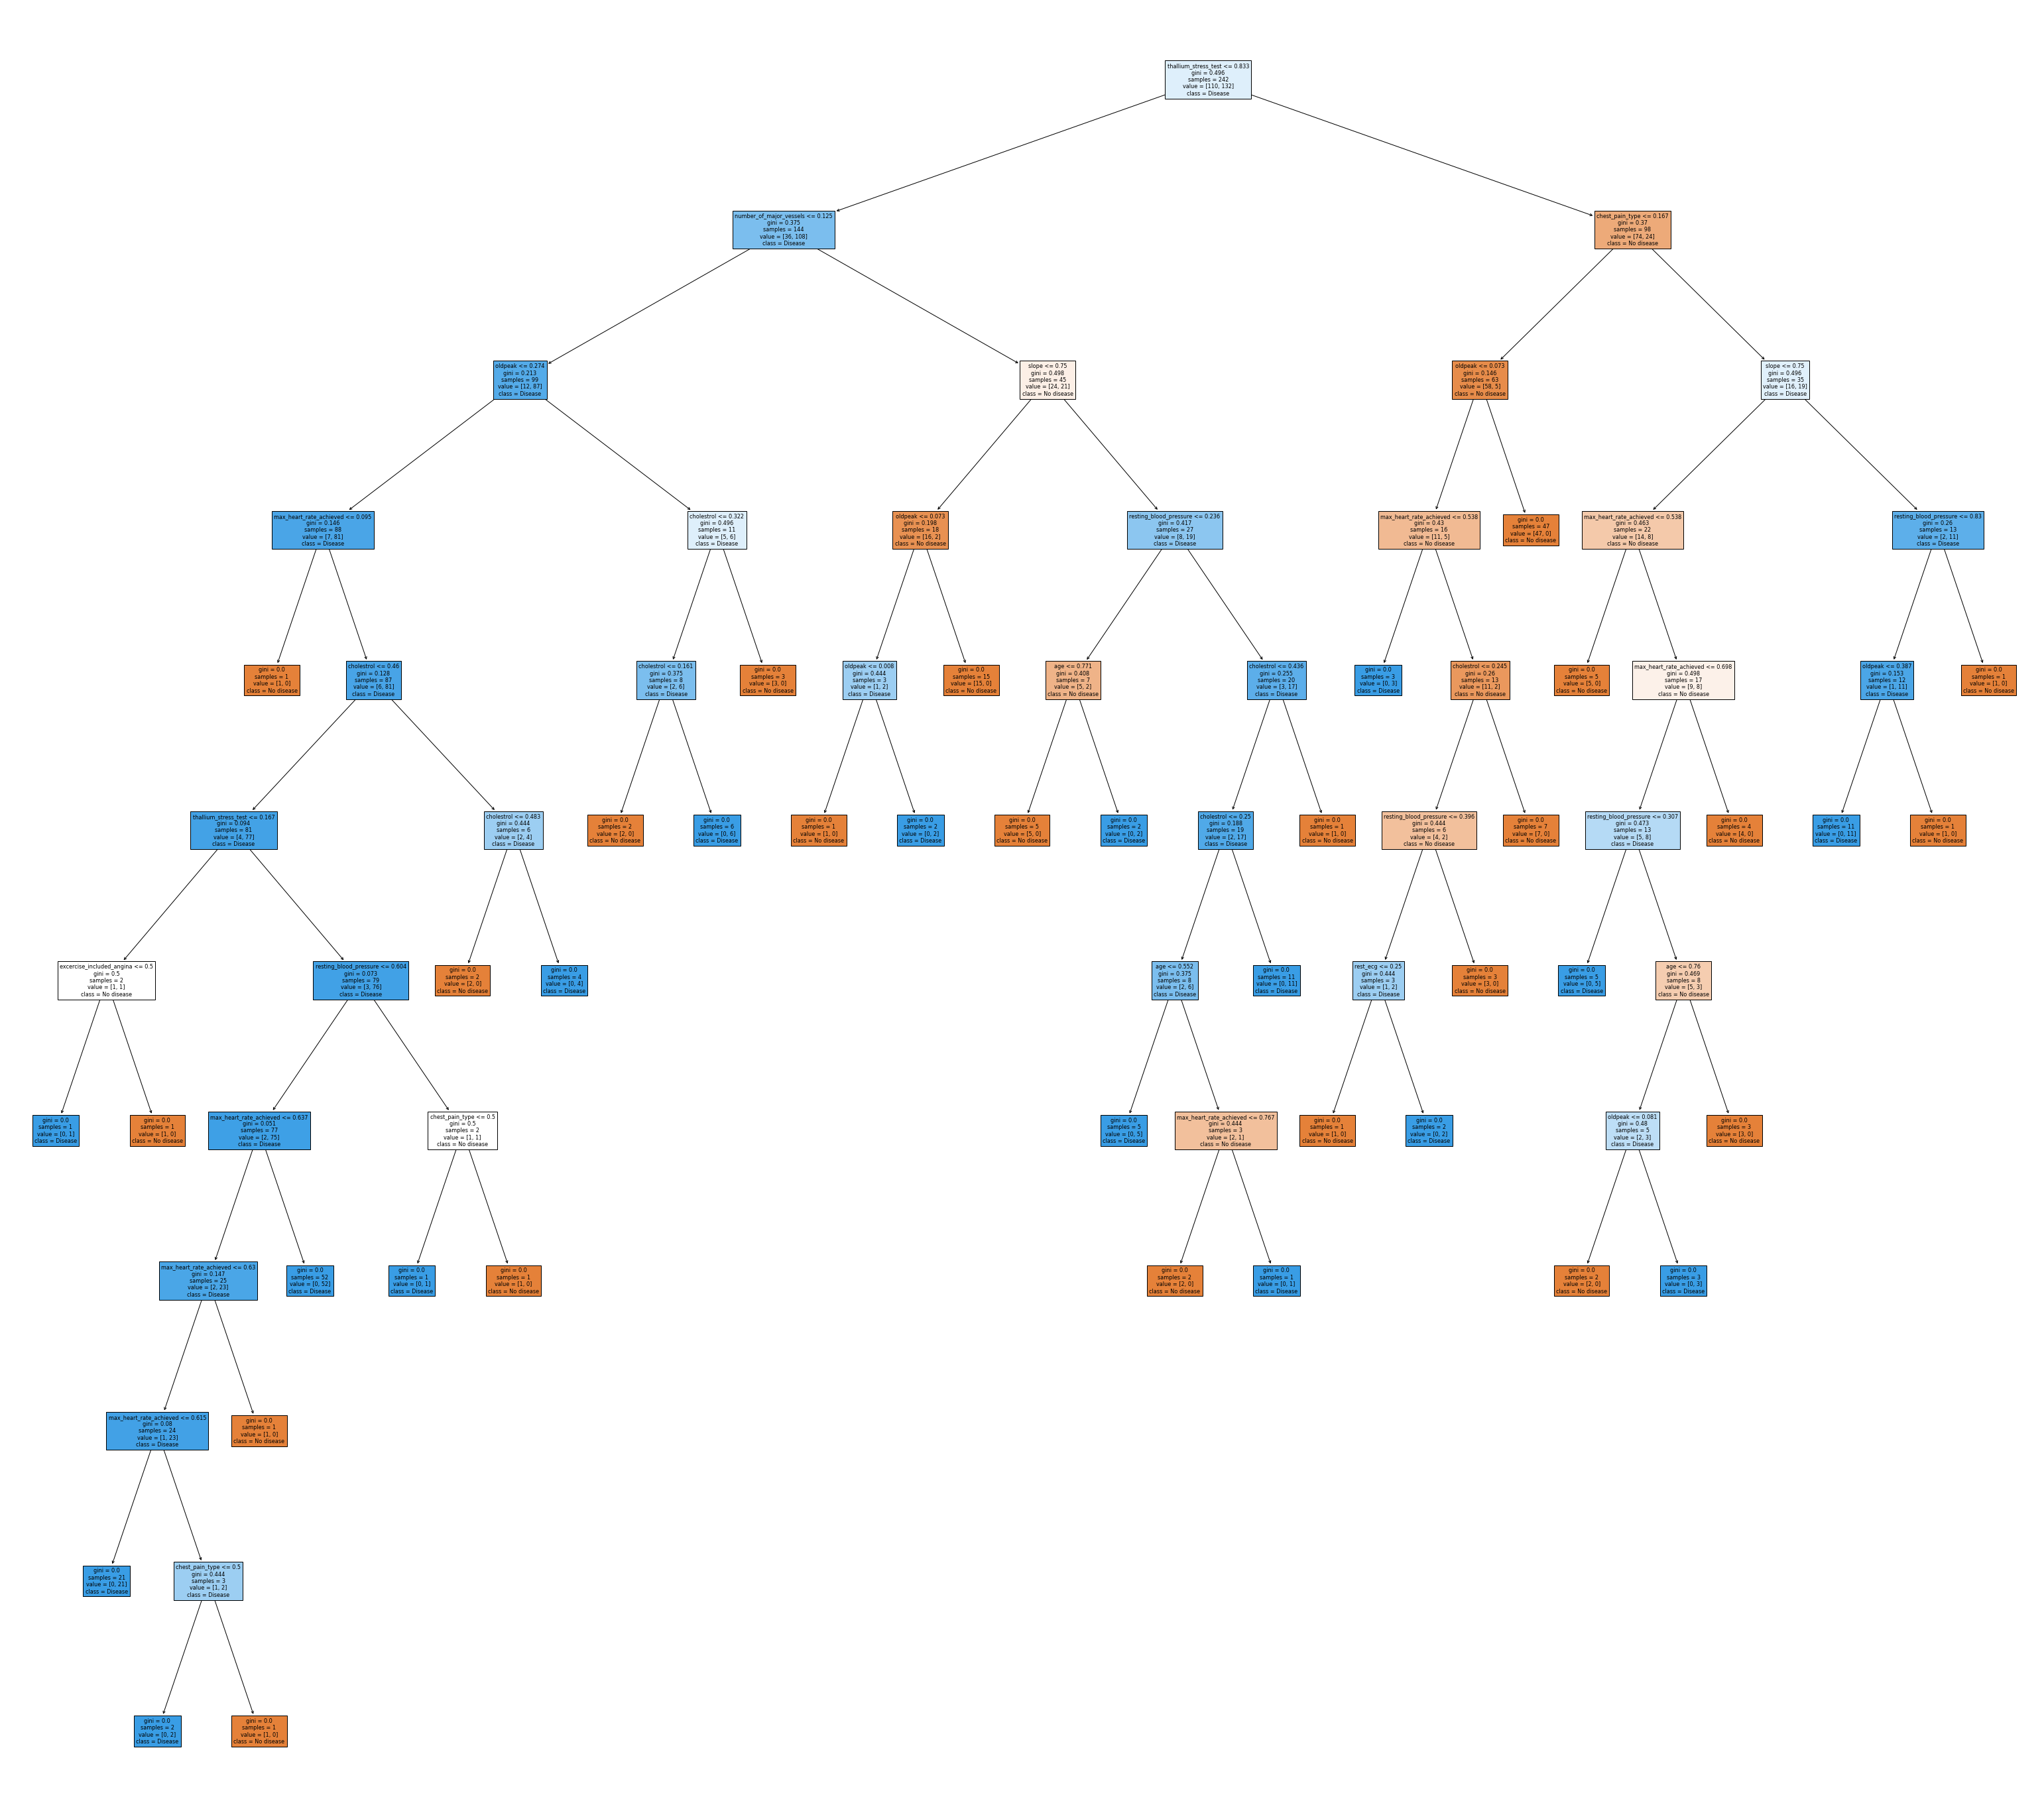

In [39]:
model_dct_mm = DecisionTreeClassifier()
model_dct_mm.fit(x_train_mm, y_train_mm)
model_dct_mm.score(x_test_mm, y_test_mm)
evaluation_report(model_dct_mm, x_train_mm, y_train_mm, x_test_mm, y_test_mm, model_name = "Decision Tree on Minmax Scaled Data")
fig = plt.figure(figsize=(55,50))
_ = tree.plot_tree(model_dct_mm, 
                   feature_names=df.columns[:-2],  
                   class_names=["No disease", "Disease"],
                   filled=True)
fig.savefig("dct_mm.png")